#### NN FROM SCRATCH

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#### Initilization
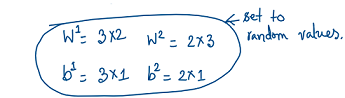

In [54]:

def initialise(in_neuron,hidden_neuron,out_neuron):
  w1=np.random.rand(hidden_neuron,in_neuron)-.5
  w2=np.random.rand(out_neuron,hidden_neuron)-.5
  b1=np.zeros((hidden_neuron,1))#np.random.rand(hidden_neuron,1)
  b2=np.zeros((out_neuron,1))
  return w1,b1,w2,b2

In [55]:

def ReLU(z):
  return np.maximum(0,z)
def linear(z):
  return z
def linearPrime(z):
  return 1
def ReLUPrime(z):
  a=ReLU(z)
  return a>0

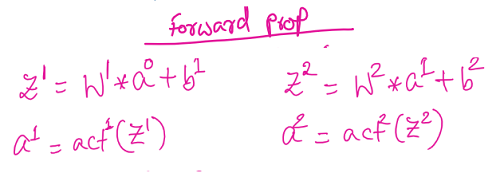

In [56]:

def forwardProp(a0,w1,b1,w2,b2):
  z1=np.dot(w1,a0)+b1
  a1=ReLU(z1)
  z2=np.dot(w2,a1)+b2
  a2=linear(z2)
  return z1,a1,z2,a2

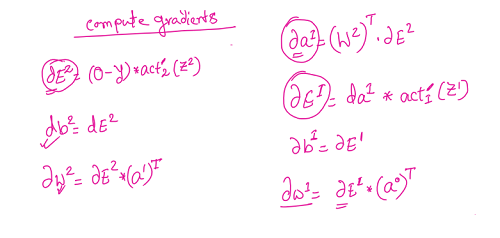

In [57]:

def computeGradient(a2,y,z2,a1,w2,z1,a0):
  de2=(a2-y)*linearPrime(z2)
  db2=de2
  dw2=np.dot(de2,a1.T)
  da1=np.dot(w2.T,de2)
  de1=da1*ReLUPrime(z1)
  db1=de1
  dw1=np.dot(de1,a0.T)
  return dw1,db1,dw2,db2

In [58]:
a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)
w1,b1,w2,b2=initialise(2,3,2)
z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
print(dw1)
print(db1)
print(dw2)
print(db2)

[[0.09210922 0.09210922]
 [0.         0.        ]
 [0.         0.        ]]
[[ 0.18421844]
 [-0.        ]
 [ 0.        ]]
[[ 0.1266898   0.          0.        ]
 [-0.18068134  0.          0.        ]]
[[ 0.43963488]
 [-0.6269946 ]]


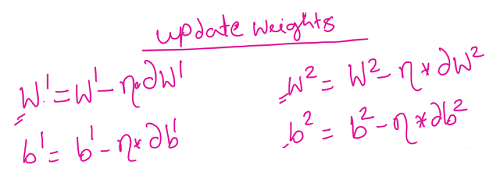

In [59]:

def updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta):
  w1=w1-eta*dw1
  b1=b1-eta*db1
  w2=w2-eta*dw2
  b2=b2-eta*db2
  return w1,b1,w2,b2

In [60]:

eta=0.01
epoch=200

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
  cost=np.sum((a2-y)**2)*.5
  print(a2)
  print(cost)

[[ 0.05663031]
 [-0.30593826]]
0.4796868944518857
[[ 0.0437046 ]
 [-0.28954405]]
0.45949725164738875
[[ 0.03115133]
 [-0.27362308]]
0.4403071992901838
[[ 0.01895363]
 [-0.25815248]]
0.4220540254118502
[[ 0.00709582]
 [-0.24311099]]
0.40468005424135556
[[-0.00443676]
 [-0.22847881]]
0.3881321522679338
[[-0.01565777]
 [-0.21423749]]
0.37236129072501556
[[-0.02658   ]
 [-0.20036978]]
0.3573221571975844
[[-0.03721543]
 [-0.18685957]]
0.34297281010594266
[[-0.04757528]
 [-0.17369178]]
0.3292743707033249
[[-0.05767009]
 [-0.16085229]]
0.31619074797165414
[[-0.06750977]
 [-0.14832784]]
0.3036883924322519
[[-0.07710364]
 [-0.13610598]]
0.2917360754255405
[[-0.0864605 ]
 [-0.12417502]]
0.28030469087131193
[[-0.09558862]
 [-0.11252395]]
0.2693670769118509
[[-0.10286431]
 [-0.10226897]]
0.26022233712131404
[[-0.10960052]
 [-0.09250217]]
0.2517352859349079
[[-0.116205  ]
 [-0.08293861]]
0.24355801276051012
[[-0.12268157]
 [-0.07357169]]
0.2356768400902956
[[-0.12903386]
 [-0.06439511]]
0.228078855

In [61]:

x_input=np.random.uniform(-1,1,(1000,2))
print(x_input)
rm=[[-1,0],
    [0,1]]
x_ground=np.dot(rm,x_input.T).T
print(x_ground)

[[ 0.44963169  0.38807931]
 [ 0.38563338  0.77821532]
 [-0.28468194 -0.30672896]
 ...
 [ 0.20421756  0.38530683]
 [-0.08185958 -0.48463969]
 [ 0.83527001  0.69611179]]
[[-0.44963169  0.38807931]
 [-0.38563338  0.77821532]
 [ 0.28468194 -0.30672896]
 ...
 [-0.20421756  0.38530683]
 [ 0.08185958 -0.48463969]
 [-0.83527001  0.69611179]]


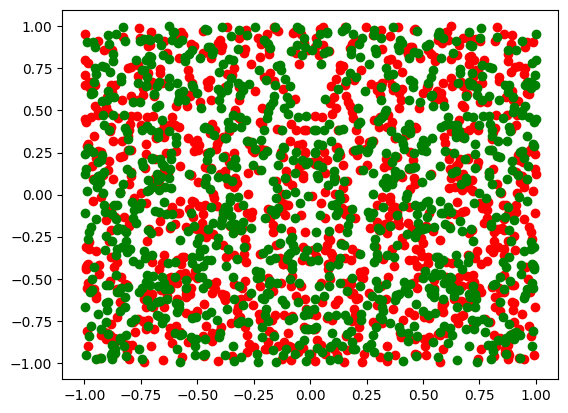

In [62]:
plt.scatter(x_input[:,0],x_input[:,1],c='RED')
plt.scatter(x_ground[:,0],x_ground[:,1],c='GREEN')
plt.show()
     

In [63]:

eta=0.1 
epoch=100

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  cost=0;
  for j in range(1000):
    a0=x_input[j,:].T.reshape(2,1)
    y=x_ground[j,:].T.reshape(2,1)
    z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
    dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
    cost=cost+np.sum((a2-y)**2)*.5
  print(cost)

     

8.125171906439723
0.4078442278642347
0.16680889224436682
0.10805600314866343
0.07671534237025214
0.05536844832937329
0.03865809976694374
0.026863660262784497
0.018010979989282656
0.01192338776122067
0.008015317201313044
0.005176726514202315
0.0033426500279100566
0.002250564275978644
0.0015513693208301987
0.0010481768102457076
0.0007389434937257491
0.0005321692590310721
0.0003954630618618107
0.00029997921102385255
0.0002329202451853554
0.00018431247614281745
0.00014877241816349906
0.00012206650819699111
0.00010133995582428662
8.499498143731356e-05
7.193668148242813e-05
6.143842332489523e-05
5.3011860948942595e-05
4.6210368202800036e-05
4.061610046580417e-05
3.583655298646567e-05
3.163160504013848e-05
2.7990777535811386e-05
2.481976718260965e-05
2.2054577482642725e-05
1.963885893893248e-05
1.750825379311058e-05
1.5621963483863342e-05
1.395099172356451e-05
1.2469929352663526e-05
1.1156560837794887e-05
9.99142069092306e-06
8.957416157753165e-06
8.039510273475653e-06
7.224454023003087e-06
6

In [64]:

test_x=np.arange(0,1,.01)
test_y=test_x**2

test=np.column_stack([test_x,test_y])
print(test)


[[0.000e+00 0.000e+00]
 [1.000e-02 1.000e-04]
 [2.000e-02 4.000e-04]
 [3.000e-02 9.000e-04]
 [4.000e-02 1.600e-03]
 [5.000e-02 2.500e-03]
 [6.000e-02 3.600e-03]
 [7.000e-02 4.900e-03]
 [8.000e-02 6.400e-03]
 [9.000e-02 8.100e-03]
 [1.000e-01 1.000e-02]
 [1.100e-01 1.210e-02]
 [1.200e-01 1.440e-02]
 [1.300e-01 1.690e-02]
 [1.400e-01 1.960e-02]
 [1.500e-01 2.250e-02]
 [1.600e-01 2.560e-02]
 [1.700e-01 2.890e-02]
 [1.800e-01 3.240e-02]
 [1.900e-01 3.610e-02]
 [2.000e-01 4.000e-02]
 [2.100e-01 4.410e-02]
 [2.200e-01 4.840e-02]
 [2.300e-01 5.290e-02]
 [2.400e-01 5.760e-02]
 [2.500e-01 6.250e-02]
 [2.600e-01 6.760e-02]
 [2.700e-01 7.290e-02]
 [2.800e-01 7.840e-02]
 [2.900e-01 8.410e-02]
 [3.000e-01 9.000e-02]
 [3.100e-01 9.610e-02]
 [3.200e-01 1.024e-01]
 [3.300e-01 1.089e-01]
 [3.400e-01 1.156e-01]
 [3.500e-01 1.225e-01]
 [3.600e-01 1.296e-01]
 [3.700e-01 1.369e-01]
 [3.800e-01 1.444e-01]
 [3.900e-01 1.521e-01]
 [4.000e-01 1.600e-01]
 [4.100e-01 1.681e-01]
 [4.200e-01 1.764e-01]
 [4.300e-01

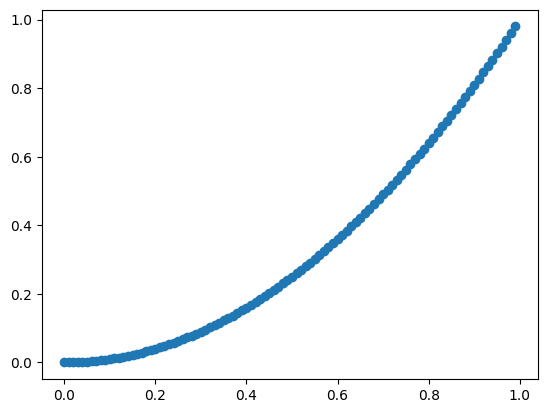

In [65]:

plt.scatter(test_x,test_y)
plt.show()

In [66]:
n=test.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=test[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

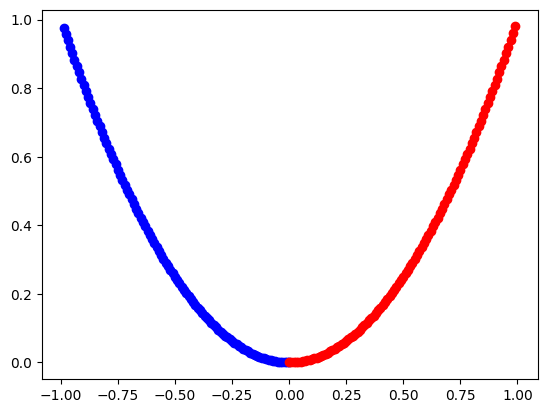

In [67]:
plt.scatter(o_x,o_y,c="blue")
plt.scatter(test[:,0],test[:,1],c="red")
plt.show()
     

In [68]:
import pandas as pd
xtest = pd.read_csv('./file.csv')
xtest=np.array(xtest)

(18154, 2)


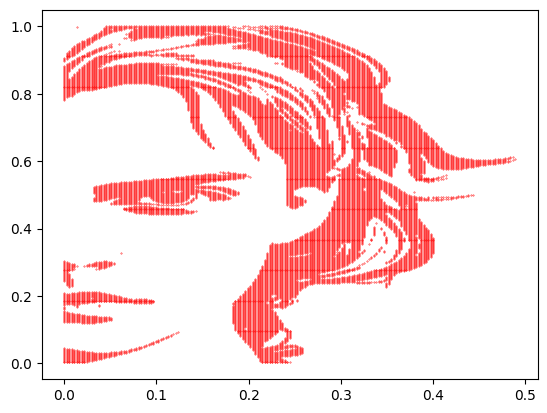

In [69]:

print(xtest.shape)
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c='RED')

In [70]:
n=xtest.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=xtest[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

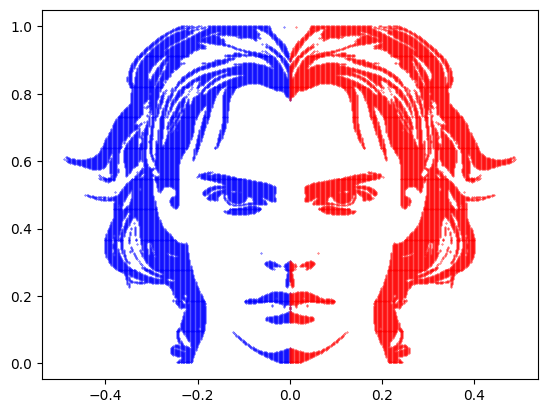

In [71]:

plt.scatter(o_x,o_y,s=.1,c="blue")
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c="red")
plt.show()